In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import os
import statistics
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [4]:
benign_path = '/home/sdsra/Downloads/CTU-Dataset/benign'
benign_datas = pd.DataFrame()
sub_dir_list = os.listdir(benign_path)
for dir in sub_dir_list:
    tmp_data = pd.read_pickle(benign_path + '/' + dir + '/datas-by-origin-tool.pkl')
    benign_datas = pd.concat([benign_datas, tmp_data], ignore_index=True)

In [5]:
malware_path = '/home/sdsra/Downloads/CTU-Dataset/malware-2' 
malware_datas = pd.DataFrame()
for dir in os.listdir(malware_path) :
    pkl_path = malware_path +'/'+dir+'/datas-by-origin-tool.pkl'
    if os.path.exists(pkl_path):
        tmp_data = pd.read_pickle(pkl_path)
        malware_datas = pd.concat([malware_datas, tmp_data], ignore_index=True)

In [6]:
malware_datas = malware_datas[malware_datas['label'] == 'botnet']

In [7]:
numeric_columns = list(filter(lambda x: x not in ['src_ip','src_port','dst_ip','dst_port','proto', 'label'], benign_datas.columns))

In [8]:
benign_datas['is_malware'] = 0
malware_datas['is_malware'] = 1

In [9]:
datas = pd.concat([benign_datas, malware_datas], ignore_index=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(datas[numeric_columns], datas['is_malware'], test_size=0.2, random_state = 101)


In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled  = scaler.transform(X_test[numeric_columns]) 

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


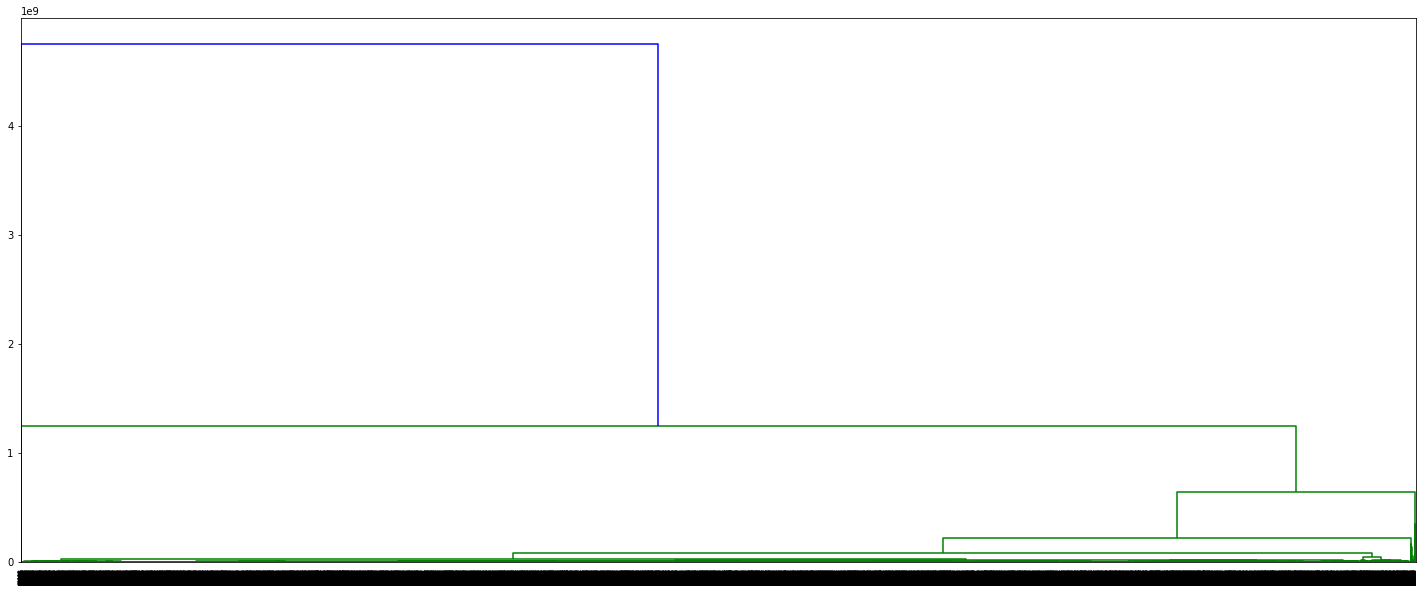

In [11]:
Z = linkage(X_train, 'ward')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z)

In [16]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [17]:
cluster.fit_predict(X_train_scaled)

array([0, 0, 0, ..., 0, 1, 0])

In [19]:
y_pred = cluster.labels_

In [22]:
len(y_pred)

67504

In [23]:
confusion_matrix(y_train, y_pred)

array([[10341,    17],
       [54234,  2912]])

In [45]:
y_pred = kmeans.predict(X_test_scaled)

In [46]:
confusion_matrix(y_test, y_pred)

array([[   16,  1330],
       [  823, 13589]])

In [53]:
TN = 16
FP = 1330
FN = 823
TP = 13589

In [54]:
accuracy = (TN + TP) / (TN + TP + FP + FN)

In [55]:
precision = TP / (TP + FN)

In [56]:
print('accuracy : {}, precision: {}'.format(accuracy, precision))

accuracy : 0.863370986165757, precision: 0.942894809880655
